# Setup

In [1]:
from matplotlib.animation import FuncAnimation as FA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Constants & Functions

In [2]:
#The probability of you winning given you have d1 points and your opponent has d2 points and w is needed to win.
def P(d1, d2, w):
    
    if d1 >= w:
        #You won.
        return(1)
    
    elif d2 >= w:
        #You lost.
        return(0)
    
    elif d1 == d2 :
        #Symmetry.
        return(1/2)
    
    else:
        
        #Half the time you will get two points.
        #Half the time your opponent will get two points.
        
        return(0.5 * (P(d1+2, d2, w) + P(d1, d2+2, w)))
    
    
    
    
#You, Opponent, To Win, Probability    
data = pd.DataFrame(columns=['Y', 'O', 'W', 'P'])

for w in range(1, 21) :
    data.loc[len(data)] = [0, 0, w, 1/2]
    for y in range(1, w) :
        for o in range(0, y) :
            p = P(y, o, w)
            data.loc[len(data)] = [y, o, w, p]
            data.loc[len(data)] = [o, y, w, 1-p]
            
        data.loc[len(data)] = [y, y, w, 1/2]

        
        
        
def plotHelper(data, w) :
    
    df = data[data['W'] == w]
    ax = fig.add_subplot(xlim = (-0.5, w-0.5), ylim = (-0.5, w-0.5))
    
    #Title.
    ax.set_title("Probability of Winning " + str(w) + " Holes", fontsize = 24)
    
    #x-axis.
    ax.set_xlabel("Your Initial Holes", fontsize = 18)
    plt.xticks(ticks = range(0, w))

    #x-axis.
    ax.set_ylabel("Opponent Initial Holes", fontsize = 18)
    plt.yticks(ticks = range(0, w))

    ax.tick_params(axis = 'both', labelsize = 16)

    heatmap = plt.scatter(x = df['Y'],
                          y = df['O'],
                          c = df['P'],
                          cmap = 'viridis_r',
                          marker = "s",
                          s = 288000/w**2,
                          vmin = 0,
                          vmax = 1)

    #Print P in each territory
    #for row in df.iterrows():
        #plt.annotate(round(row[1][3], 3),
                     #(row[1][0], row[1][1]),
                     #c = "k",
                     #fontsize = 200/w,
                     #ha = "center",
                     #va = "center")    
    #Colorbar.
    cb = plt.colorbar(heatmap)
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    cb.set_ticks(ticks)
    cb.set_label('Probability That You Win',
                 labelpad = -80,
                 fontsize = 20)
    cb.ax.tick_params(labelsize = 16)

In [3]:
P(1,0,3)

0.75

In [4]:
P(1,0,5)

0.6875

In [5]:
for w in range(0,20):
    print(P(1,0,w+1)*(2**w))

1
1.0
3.0
4.0
11.0
16.0
42.0
64.0
163.0
256.0
638.0
1024.0
2510.0
4096.0
9908.0
16384.0
39203.0
65536.0
155382.0
262144.0


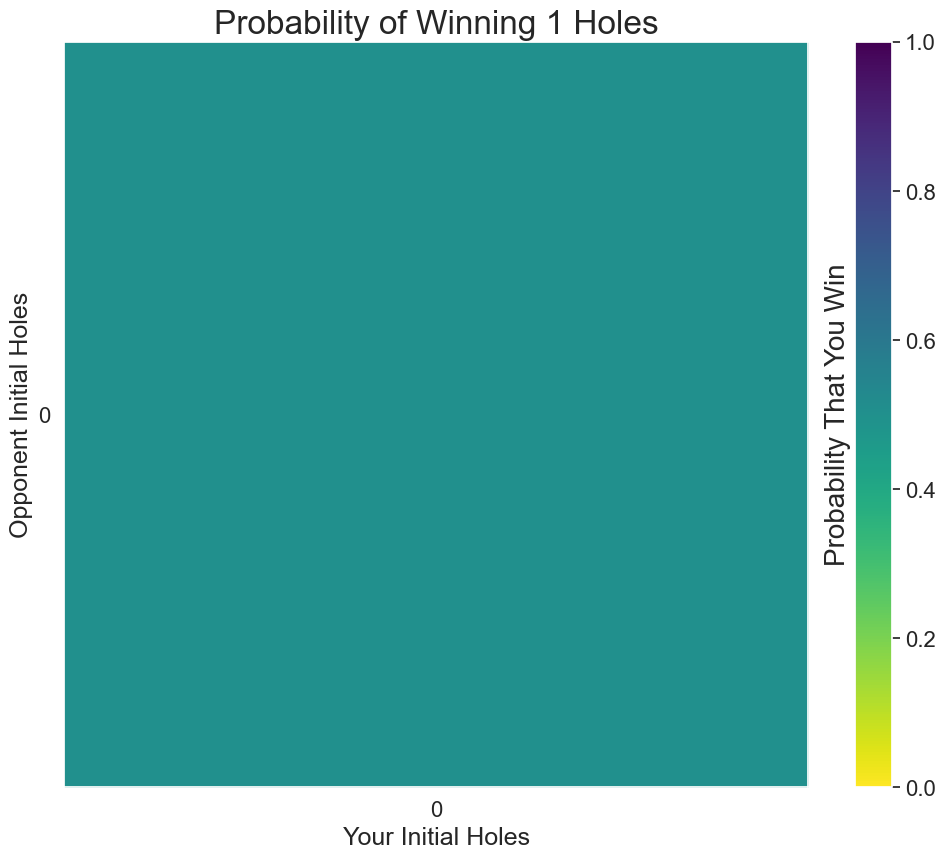

In [6]:
#Animate 
sns.set()
fig = plt.figure(figsize = (12.0, 9.7))

def animate(i):
    plt.clf()
    plotHelper(data, i+1)
    
#Run animation.
anim = FA(fig, animate, frames = 20, interval = 1200)   

#Save animation.
anim.save('2025.04.18.mp4'); 

##### Rohan Lewis

#### 2025.04.18